<a href="https://colab.research.google.com/github/josimardtm/MIEL/blob/main/Tutorial04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 4 para el uso de Pandapower en el Curso de Microrredes Eléctricas 2025-1

## Instalar Pandapower con sus dependencias

In [ ]:
# Instalación de Pandapower con todas las dependencias necesarias
!pip install pandapower[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.0/864.0 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 k

## Creación de la red simple desbalanceada
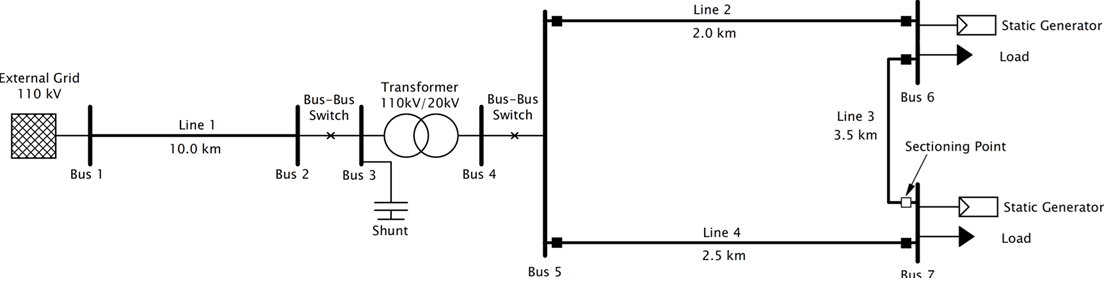

In [ ]:
import pandapower as pp #import pandapower

net = pp.create_empty_network() # crear red vacía

# crear nodos
bus1 = pp.create_bus(net, name="HV Busbar", vn_kv=110, type="b")
bus2 = pp.create_bus(net, name="HV Busbar 2", vn_kv=110, type="b")
bus3 = pp.create_bus(net, name="HV Transformer Bus", vn_kv=110, type="n")
bus4 = pp.create_bus(net, name="MV Transformer Bus", vn_kv=20, type="n")
bus5 = pp.create_bus(net, name="MV Main Bus", vn_kv=20, type="b")
bus6 = pp.create_bus(net, name="MV Bus 1", vn_kv=20, type="b")
bus7 = pp.create_bus(net, name="MV Bus 2", vn_kv=20, type="b")

pp.create_ext_grid(net, bus1, vm_pu=1.02, va_degree=50) # crear conexión de red externa

# crear nuevo tipo estándar de transformador
pp.create_std_type(net, {"sn_mva": 25, "vn_hv_kv": 110, "vn_lv_kv": 20,  "vk_percent": 12,
        "vkr_percent": 0.41, "pfe_kw": 14, "i0_percent": 0.07,
        "shift_degree": 150, "vector_group": "Dyn", "tap_side": "lv",
        "tap_neutral": 0, "tap_min": -9, "tap_max": 9, "tap_step_degree": 0,
        "tap_step_percent": 1.5, "tap_changer_type": "Ratio", "vk0_percent": 6,
        "vkr0_percent": 0.78125, "mag0_percent": 100, "mag0_rx": 0.,
        "si0_hv_partial": 0.9,}, name='trafotipo1', element="trafo")

# crear transformador
trafo1 = pp.create_transformer(net, bus3, bus4, name="110kV/20kV transformer", std_type="trafotipo1")

# crear nuevos tipos estándar de líneas
lineatipo1=pp.create_std_type(net, {"r_ohm_per_km": 0.1941, "x_ohm_per_km": 0.07476991,
                "c_nf_per_km": 1160., "max_i_ka": 0.421,
                "endtemp_degree": 70.0, "r0_ohm_per_km": 0.7766,
                "x0_ohm_per_km": 0.2990796,
                "c0_nf_per_km":  496.2}, name="tipo1",element = "line")

lineatipo2=pp.create_std_type(net, {"r_ohm_per_km": 0.1220, "x_ohm_per_km": 0.11200,
                "c_nf_per_km": 304.0, "max_i_ka": 0.421,
                "endtemp_degree": 70.0, "r0_ohm_per_km": 0.7766,
                "x0_ohm_per_km": 0.2990796,
                "c0_nf_per_km":  496.2}, name="tipo2",element = "line")

lineatipo3=pp.create_std_type(net, {"r_ohm_per_km": 0.5939, "x_ohm_per_km": 0.37200,
                "c_nf_per_km": 9.5, "max_i_ka": 0.210,
                "endtemp_degree": 70.0, "r0_ohm_per_km": 0.7766,
                "x0_ohm_per_km": 0.2990796,
                "c0_nf_per_km":  496.2}, name="tipo3",element = "line")

# crear líneas
line1 = pp.create_line(net, bus1, bus2, length_km=10, std_type="tipo1",  name="Line 1",)
line2 = pp.create_line(net, bus5, bus6, length_km=2.0, std_type="tipo2", name="Line 2")
line3 = pp.create_line(net, bus6, bus7, length_km=3.5, std_type="tipo3", name="Line 3")
line4 = pp.create_line(net, bus7, bus5, length_km=2.5, std_type="tipo2", name="Line 4")

# interruptores
sw1 = pp.create_switch(net, bus2, bus3, et="b", type="CB", closed=True)
sw2 = pp.create_switch(net, bus4, bus5, et="b", type="CB", closed=True)
sw3 = pp.create_switch(net, bus5, line2, et="l", type="LBS", closed=True)
sw4 = pp.create_switch(net, bus6, line2, et="l", type="LBS", closed=True)
sw5 = pp.create_switch(net, bus6, line3, et="l", type="LBS", closed=True)
sw6 = pp.create_switch(net, bus7, line3, et="l", type="LBS", closed=False)
sw7 = pp.create_switch(net, bus7, line4, et="l", type="LBS", closed=True)
sw8 = pp.create_switch(net, bus5, line4, et="l", type="LBS", closed=True)

# cargas
pp.create_load(net, bus7, p_mw=2, q_mvar=4, scaling=1, name="load")
pp.create_asymmetric_load(net, bus6, p_a_mw=2, p_b_mw=3, p_c_mw=3.2, q_a_mvar=1, q_b_mvar=1.2, q_c_mvar=1, name="load_6", scaling=1.0, index=None, in_service=True, type='wye')
pp.create_asymmetric_load(net, bus7, p_a_mw=4, p_b_mw=3, p_c_mw=2, q_a_mvar=1, q_b_mvar=0.8, q_c_mvar=0.6, name="load_7", scaling=1.0, index=None, in_service=True, type='wye')

# generadores
pp.create.create_asymmetric_sgen(net, bus6, p_a_mw=0.67, p_b_mw=0.67, p_c_mw=0.67, q_a_mvar=-0.167, q_b_mvar=-0.167, q_c_mvar=-.1670, sn_mva=2, name="SolarPlant_6")
pp.create_sgen(net, bus7, p_mw=2, q_mvar=-0.5, name="SolarPlant_7") # generación estática

# banco de condensadores
pp.create_shunt(net, bus3, q_mvar=-0.96, p_mw=0, name='Shunt')

print(net)

This pandapower network includes the following parameter tables:
   - bus (7 elements)
   - load (1 element)
   - sgen (1 element)
   - asymmetric_load (2 elements)
   - asymmetric_sgen (1 element)
   - switch (8 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (4 elements)
   - trafo (1 element)


In [ ]:
net.asymmetric_load

,name,bus,p_a_mw,q_a_mvar,p_b_mw,q_b_mvar,p_c_mw,q_c_mvar,sn_mva,scaling,in_service,type
0,load_6,5,2.0,1.0,3.0,1.2,3.2,1.0,NaN,1.0,True,wye
1,load_7,6,4.0,1.0,3.0,0.8,2.0,0.6,NaN,1.0,True,wye


##  Correr el flujo desbalanceado

In [ ]:
net.ext_grid['s_sc_max_mva'] = 1000
net.ext_grid['rx_max'] = 0.1
pp.add_zero_impedance_parameters(net)

pp.pf.runpp_3ph.runpp_3ph(net)

In [ ]:
net.res_bus_3ph

,vm_a_pu,va_a_degree,vm_b_pu,va_b_degree,vm_c_pu,va_c_degree,p_a_mw,q_a_mvar,p_b_mw,q_b_mvar,p_c_mw,q_c_mvar,unbalance_percent
0,1.020368,49.935391,1.018820,-69.985559,1.020813,170.050168,-5.496682,11.609793,-5.119403,11.065859,-4.879429,11.678347,0.118427
1,1.018499,49.774196,1.017030,-70.129508,1.019246,169.893823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127843
2,1.018499,49.774196,1.017030,-70.129508,1.019246,169.893823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127843
3,0.960076,-104.697902,0.954516,135.525884,0.965140,16.035793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654762
4,0.960076,-104.697902,0.954516,135.525884,0.965140,16.035793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654762
5,0.960266,-104.679235,0.944863,135.669015,0.956233,15.646778,1.330000,1.167000,2.330000,1.367000,2.530000,1.167000,0.633093
6,0.937727,-104.653478,0.942510,134.983499,0.962559,16.317339,4.000000,2.500000,3.000000,2.300000,2.000000,2.100000,0.805168


In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame con 8 columnas de números aleatorios con distribución uniforme
num_rows = 4  # Número de filas
num_columns = 12  # Número de columnas

# Generar los datos aleatorios
loads = np.random.uniform(low=0.9, high=1, size=(num_rows, num_columns))

# Crear el DataFrame
loads_df = pd.DataFrame(loads, columns=[f"Column_{i+1}" for i in range(num_columns)])

loads_df.head()



,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12
0,0.999479,0.964220,0.958402,0.983142,0.951674,0.943615,0.983664,0.902239,0.929893,0.963875,0.916210,0.951513
1,0.923411,0.951254,0.924776,0.962277,0.939459,0.997112,0.908786,0.921058,0.960425,0.910886,0.934484,0.969842
2,0.996112,0.996606,0.971375,0.946122,0.976055,0.916296,0.934382,0.946347,0.919098,0.959422,0.903123,0.942137
3,0.999436,0.964331,0.961718,0.918032,0.984374,0.975247,0.900447,0.986525,0.932707,0.976560,0.985627,0.979552


In [ ]:
P6=net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_6", "p_a_mw"]
Q6=net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_6", "q_a_mvar"]
P7=net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_7", "p_a_mw"]
Q7=net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_7", "q_a_mvar"]

voltages_a=[]
voltages_b=[]
voltages_c=[]

for index,row in loads_df.iterrows():
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_6", "p_a_mw"] = P6*row["Column_1"]
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_6", "p_b_mw"] = P6*row["Column_2"]
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_6", "p_c_mw"] = P6*row["Column_3"]
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_6", "q_a_mvar"] = Q6*row["Column_4"]
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_6", "q_b_mvar"] = Q6*row["Column_5"]
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_6", "q_c_mvar"] = Q6*row["Column_6"]

  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_7", "p_a_mw"] = P6*row["Column_7"]
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_7", "p_b_mw"] = P6*row["Column_8"]
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_7", "p_c_mw"] = P6*row["Column_9"]
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_7", "q_a_mvar"] = Q6*row["Column_10"]
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_7", "q_b_mvar"] = Q6*row["Column_11"]
  net.asymmetric_load.loc[net.asymmetric_load["name"] == "load_7", "q_c_mvar"] = Q6*row["Column_12"]

  pp.pf.runpp_3ph.runpp_3ph(net)
  voltages_a.append(net.res_bus_3ph.loc[bus7, "vm_a_pu"])
  voltages_b.append(net.res_bus_3ph.loc[bus7, "vm_b_pu"])
  voltages_c.append(net.res_bus_3ph.loc[bus7, "vm_c_pu"])


/usr/local/lib/python3.11/dist-packages/pandapower/pf/create_jacobian.py:27: RuntimeWarning: invalid value encountered in divide
  dVm_x, dVa_x = dSbus_dV_numba_sparse(Ybus.data, Ybus.indptr, Ybus.indices, V, V / abs(V), Ibus)
/usr/local/lib/python3.11/dist-packages/pandapower/pypower/newtonpf.py:441: MatrixRankWarning: Matrix is exactly singular
  dx = -1 * spsolve(J, F, permc_spec=permc_spec, use_umfpack=use_umfpack)
/usr/local/lib/python3.11/dist-packages/pandapower/pf/runpp_3ph.py:468: RuntimeWarning: invalid value encountered in divide
  i_abc_it_wye = (np.divide(s_abc_pu, v_abc_it)).conjugate()
/usr/local/lib/python3.11/dist-packages/pandapower/pf/runpp_3ph.py:469: RuntimeWarning: invalid value encountered in divide
  i_abc_it_delta = np.matmul(i_del_xfmn, (np.divide(s_abc_delta_pu, np.matmul
/usr/local/lib/python3.11/dist-packages/pandapower/results_bus.py:74: RuntimeWarning: invalid value encountered in divide
  net["res_bus_3ph"]["unbalance_percent"] = np.abs(V012_pu[2, :]/V01

In [ ]:
print(voltages_a)

[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)]
